In [1]:
from lowres_MVEE import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### Generate some 2D test data

In [2]:
nD = 2
n_pts = 1000
pts = np.random.randn(nD,n_pts)

##### Compute the MVEE using Khachiyan's Algorithm

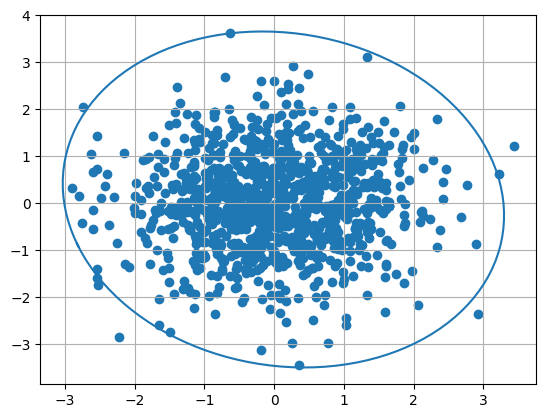

In [3]:
A, c = min_vol_ellipse(pts,tolerance=1e-1)
[D, P] = np.linalg.eig(A)
radii = 1 / np.sqrt(D)

fig = plt.figure()
ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
scatter_nD(pts,ax)
ellipse_plot(A,c,ax)
ax.grid('true')
# ax.axis('equal')
plt.show()

Notice how it's not bounding. We need to address this first.

#### Scale this MVEE so that it actually encloses the points

Undo the transformation defined by (A,c) s.t. the ellipse is mapped to the unit circle. Apply this same transformation to our data.

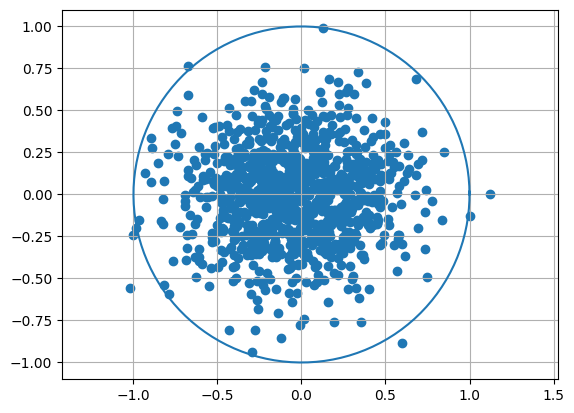

In [4]:
tm = np.diagflat(np.sqrt(D)) @ P.T
pts_mapped_to_unit_sphere = tm @ (pts-c)

fig = plt.figure()
ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
ax.grid('true')
ax.axis('equal')
scatter_nD(pts_mapped_to_unit_sphere,ax)
ellipse_plot(np.eye(nD),np.zeros_like(c),ax)
plt.show()

Scale the unit circle so it encompasses the points.

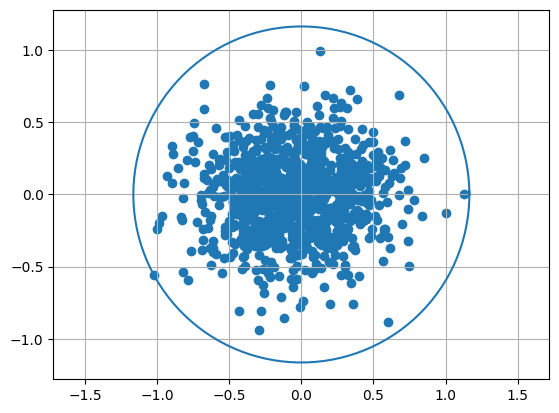

In [5]:
radial_scaling_to_correct_undershoot = np.max(np.linalg.norm(pts_mapped_to_unit_sphere,axis=0))
A_sf = 1/radial_scaling_to_correct_undershoot**2

fig = plt.figure()
ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
ax.grid('true')
ax.axis('equal')
scatter_nD(pts_mapped_to_unit_sphere,ax)
ellipse_plot(A_sf*np.eye(nD),np.zeros_like(c),ax)
plt.show()

Apply the scaling factor to the ellipse

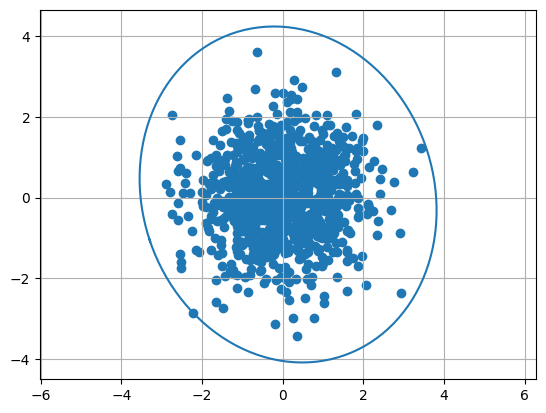

In [6]:
new_D = A_sf * D
new_D = np.diagflat(new_D)

fig = plt.figure()
ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
ax.grid('true')
ax.axis('equal')
scatter_nD(pts,ax)
ellipse_plot(P @ new_D @ P.T, c, ax)
plt.show()

#### Compute the low-res polyhedron that bounds the corrected ellipse

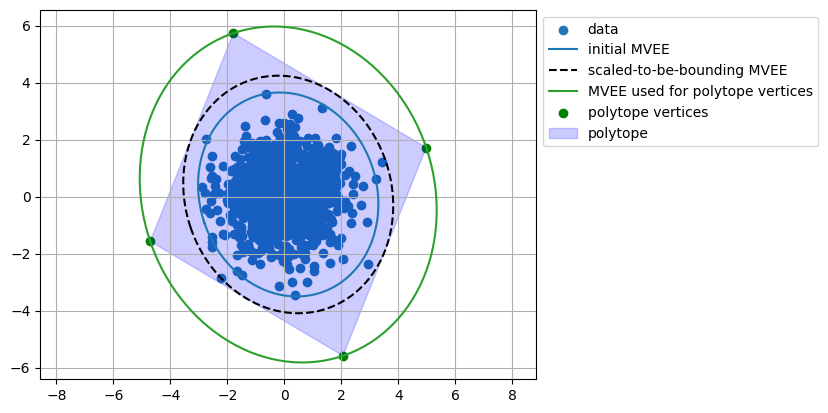

In [7]:
mesh_density = 3
V = get_mesh_vertices(nD,mesh_density) # polyhedron coordinates on a unit sphere
D_sf = scaling_factor(nD,mesh_density) * 1/np.sqrt(A_sf)

D_diag = np.diagflat(D)
D_sqrt_inv = np.diagflat([1/np.sqrt(D[i]) for i in range(len(D))])
tm = P @ (D_sf * D_sqrt_inv)
V = (tm @ V.T) + c

if nD == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
    ax.grid('true')
    ax.axis('equal')
    scatter_nD(pts,ax)

    ellipse_plot(A, c, ax)
    ellipse_plot(A_sf * A, c, ax)
    ellipse_plot(1 / D_sf**2 * A, c, ax)
    scatter_nD(V,ax)
    plot_polyhedron(V,ax)
    ax.lines[1].set_color('black')
    ax.lines[1].set_linestyle('--')
    ax.collections[1].set_color('green')
    ax.legend(['data','initial MVEE','scaled-to-be-bounding MVEE','MVEE used for polytope vertices','polytope vertices', 'polytope'], loc="upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

elif nD == 3:
    plt.switch_backend('TkAgg')  # or 'Qt5Agg'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
    ax.grid('true')
    ax.axis('equal')
    scatter_nD(pts,ax)
    
    # ellipse_plot(1 / D_sf**2 * A, c, ax)
    scatter_nD(V,ax)
    plot_polyhedron(V,ax)
    ax.view_init(90, -90) # → XY Plane (Top-down)
    # ax.view_init(0, -90) # → XZ Plane (Front view)
    # ax.view_init(0, 0) # → YZ Plane (Side view)

    plt.show(block=True)
    %matplotlib inline

#### LowResMVEE demo

LowResMVEE will handle the process described in this notebook.

##### 2D example

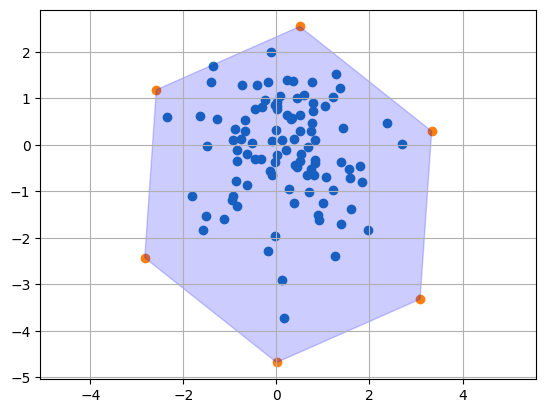

In [8]:
nD = 2
n_pts = 100
pts = np.random.randn(nD,n_pts)

lrMVEE = LowResMVEE(pts)
V = lrMVEE.vertices

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection=None if nD < 3 else '3d')
ax.grid('true')
ax.axis('equal')
scatter_nD(pts,ax)
scatter_nD(V,ax)
plot_polyhedron(V,ax)
plt.show()

##### 4D example

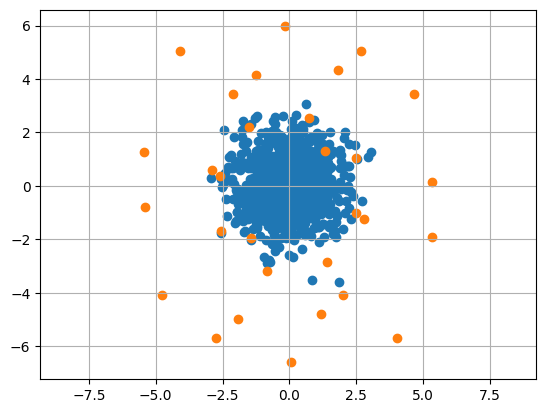

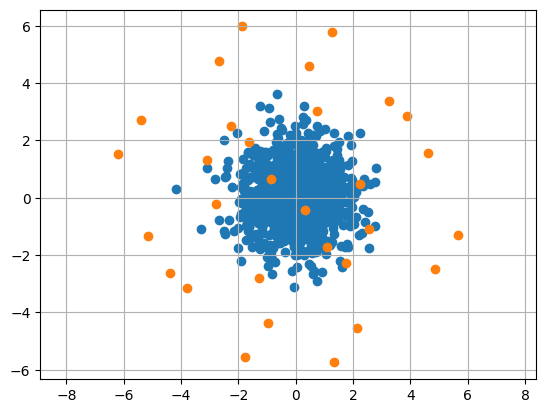

In [9]:
pts = np.random.randn(4,1000)

lrMVEE = LowResMVEE(pts,max_n_verts=32)
V = lrMVEE.vertices

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection=None)
ax.grid('true')
ax.axis('equal')
ax.scatter(pts[0,:],pts[1,:])
ax.scatter(V[0,:],V[1,:])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection=None)
ax.grid('true')
ax.axis('equal')
ax.scatter(pts[2,:],pts[3,:])
ax.scatter(V[2,:],V[3,:])
plt.show()